In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

## Lottery + Daily + Streak

### Import Data

In [3]:
path = '/Users/djw/Documents/pCloud_synced/Academics/Projects/2020_thesis/thesis_experiments/3_experiments/3_3_experience_sampling/3_3_2_processed_data/'

In [4]:
df = pd.read_csv(path + 'run1_earnings.csv')

In [5]:
df.head()

Unique Identifier                 ParticipantIdentifier        Date  \
0  recxBE5s2I8FJEE88  79939a12-9002-468d-a41b-15c3b66d3de5  12/20/2022   
1  recxdrVJKIBMHxr44  156895d9-0f71-4844-92dd-3fb298f84f2b  12/20/2022   
2  recEQtwoQAi20C4zq  3bb57dd9-1d69-471c-b769-b3323748bb9f  12/20/2022   
3  recGtrYf8whMx8uZE  92863208-10a4-443b-a225-18630552f5cc  12/20/2022   
4  recGdRMHDPsxIPruT  151eec8c-0ba1-48ba-afc8-f2874dad3a2b  12/20/2022   

             Type Reward  Link to Subjects  
0  DailyAdherence  $0.00               NaN  
1  DailyAdherence  $1.65               NaN  
2  DailyAdherence  $1.65               NaN  
3  DailyAdherence  $0.00               NaN  
4  DailyAdherence  $0.00               NaN

### Select Participants

In [6]:
# select actual run 1 study participants
path = '/Users/djw/Documents/pCloud_synced/Academics/Projects/2020_thesis/thesis_experiments/3_experiments/3_3_experience_sampling/3_3_1_raw_data/testing/run1_check_adherence/'

subjects = pd.read_csv(path + 'run1_participants.csv')
subjects = subjects.ParticipantIdentifier

# filter
df = df.loc[df.ParticipantIdentifier.isin(subjects)]

### Clean/Format

In [7]:
# make Reward numeric
df['Reward'] = df['Reward'].replace('\$|,', '', regex=True)
df['Reward'] = pd.to_numeric(df['Reward'])

In [8]:
# sum rewards over categories and types
df = pd.DataFrame(df.groupby(['ParticipantIdentifier', 'Type'])['Reward'].sum()).reset_index()

In [9]:
# convert from long to wide
df = pd.pivot(df, index='ParticipantIdentifier', columns='Type', values='Reward').fillna(0).reset_index()

# note that this sort does not match the airtable sort method - so sort in temp airtable table
df.sort_values(by='ParticipantIdentifier')

Type                 ParticipantIdentifier  DailyAdherence  Lottery  Streak
0     0501ba67-3406-4779-aff1-878a0e9f7885          235.45    200.0    70.0
1     099765a5-a9c9-4fff-b297-a39eab517267           59.13      0.0     0.0
2     0ca43379-41b5-47fb-90ba-0a22e6bf5586          245.76    200.0    70.0
3     146e1ab8-c4ca-4a52-9261-e108b38eea53          231.42      0.0    49.0
4     147400db-43d9-4155-8bf2-b85b8adf4315          246.27    100.0    70.0
..                                     ...             ...      ...     ...
87    ed16354a-961a-4e5e-83de-ce9a17b25a2f          111.30      0.0    35.0
88    f889f1a4-9754-456e-ae08-092f992d3359           63.45      0.0     0.0
89    fa996c7b-fd1c-4cba-990a-336f4cefaeb4           76.62      0.0    21.0
90    fed3a16b-c5a3-4a84-a111-32b7574e04b5          247.65    100.0    70.0
91    ff129772-aeab-4432-8136-8f94027b8504           46.14      0.0     0.0

[92 rows x 4 columns]

## BART + Spatial Span

### Import Data

In [10]:
bss = pd.read_csv('../../3_3_2_processed_data/run1_tasks.csv')

### Select Participants

In [11]:
# select actual run 1 study participants
path = '/Users/djw/Documents/pCloud_synced/Academics/Projects/2020_thesis/thesis_experiments/3_experiments/3_3_experience_sampling/3_3_1_raw_data/testing/run1_check_adherence/'

subjects = pd.read_csv(path + 'run1_participants.csv')
subjects = subjects.ParticipantIdentifier

# filter
bss = bss.loc[bss.ParticipantIdentifier.isin(subjects)]

In [12]:
bss.head()

ParticipantIdentifier  trial_date task_motivation_time  \
0  6b827de8-fe47-4007-aad3-202655b954e3  2022-10-24             07:09:39   
1  a33e1d38-6ee8-4da6-993b-a94a8ae7fc30  2022-10-24             08:01:46   
2  c2097f36-4ca3-4537-856d-a649d1557553  2022-10-24             08:35:13   
3  bf670311-c590-473a-98ab-d719ebf0f2ab  2022-10-24             08:45:24   
4  f889f1a4-9754-456e-ae08-092f992d3359  2022-10-24             08:48:48   

   task_motivation_level task_gng_time  task_gng_incorrectNoGo  \
0                      6      07:20:42                     3.0   
1                      8      09:02:28                     8.0   
2                      5      08:50:21                     1.0   
3                      5      08:56:59                     5.0   
4                      2      09:02:03                     1.0   

   task_gng_incorrectGo  task_gng_correctGo  task_gng_correctNoGo  \
0                   2.0                38.0                   7.0   
1                   0.0                40.0                   2.0   
2                  20.0                20.0                   9.0   
3                   0.0                40.0                   5.0   
4                   0.0                40.0                   9.0   

   task_gng_avgRt  ...  task_stroop_totalAvgRT  task_stroop_congruentAvgRT  \
0      450.674419  ...                0.791628                    0.732122   
1      310.125000  ...                0.941749                    0.792281   
2      226.853659  ...                1.036671                    0.939082   
3      361.733333  ...                0.772919                    0.708396   
4      398.804878  ...                0.833122                    0.754119   

   task_stroop_incongruentAvgRT  task_psat_accuracy  task_psat_avgRT  \
0                      0.840315            0.866667         1.649477   
1                      1.064041            0.766667         1.920177   
2                      1.264379            0.000000         3.000000   
3                      0.892746            0.333333         2.259841   
4                      0.885791            0.433333         2.331362   

   task_hanoi_solved  task_hanoi_time  task_hanoi_moves  \
0               True        58.440441              44.0   
1               True        26.781238              34.0   
2               True        40.018429              69.0   
3              False        33.449983              36.0   
4               True        78.185885              49.0   

   task_spatialSpan_score task_spatialSpan_time  
0                   380.0              07:17:07  
1                   195.0              08:54:21  
2                   255.0              08:46:18  
3                   380.0              08:53:13  
4                   430.0              08:57:05  

[5 rows x 47 columns]

### Clean/Format Data

In [13]:
# select bart
bart = bss[['ParticipantIdentifier', 'trial_date', 'task_bart_score']]
# select spatial span
sspan = bss[['ParticipantIdentifier', 'trial_date', 'task_spatialSpan_score']]

In [14]:
perf_tasks = bart.merge(sspan, how='left', on=['ParticipantIdentifier', 'trial_date'])

In [15]:
perf_tasks

ParticipantIdentifier  trial_date  task_bart_score  \
0     6b827de8-fe47-4007-aad3-202655b954e3  2022-10-24            485.0   
1     a33e1d38-6ee8-4da6-993b-a94a8ae7fc30  2022-10-24            765.0   
2     c2097f36-4ca3-4537-856d-a649d1557553  2022-10-24            615.0   
3     bf670311-c590-473a-98ab-d719ebf0f2ab  2022-10-24            630.0   
4     f889f1a4-9754-456e-ae08-092f992d3359  2022-10-24            455.0   
...                                    ...         ...              ...   
4271  1e7aef96-16cc-43f8-95d4-e3bc582eb6d3  2022-12-18            675.0   
4272  a8b5a9ea-b762-4f46-a431-6c530215c498  2022-12-18            485.0   
4273  596d1036-bafa-47c3-9886-a588a37789bb  2022-12-18            680.0   
4274  156895d9-0f71-4844-92dd-3fb298f84f2b  2022-12-18            400.0   
4275  b62eaadd-1819-41da-a70b-a46d4151db72  2022-12-18            610.0   

      task_spatialSpan_score  
0                      380.0  
1                      195.0  
2                      255.0  
3                      380.0  
4                      430.0  
...                      ...  
4271                   430.0  
4272                   405.0  
4273                   410.0  
4274                   440.0  
4275                     NaN  

[4276 rows x 4 columns]

In [16]:
perf_tasks_sum = pd.DataFrame(perf_tasks.groupby(['ParticipantIdentifier'])[['task_spatialSpan_score', 'task_bart_score']].sum()).reset_index()
perf_tasks_sum.head(5)

ParticipantIdentifier  task_spatialSpan_score  \
0  0501ba67-3406-4779-aff1-878a0e9f7885                 31185.0   
1  099765a5-a9c9-4fff-b297-a39eab517267                  7170.0   
2  0ca43379-41b5-47fb-90ba-0a22e6bf5586                 24835.0   
3  146e1ab8-c4ca-4a52-9261-e108b38eea53                 38045.0   
4  147400db-43d9-4155-8bf2-b85b8adf4315                 20215.0   

   task_bart_score  
0          35915.0  
1           4390.0  
2          42620.0  
3          44045.0  
4          44455.0

### Plot Data

In [17]:
sns.set_context(context='talk')

#### Totals

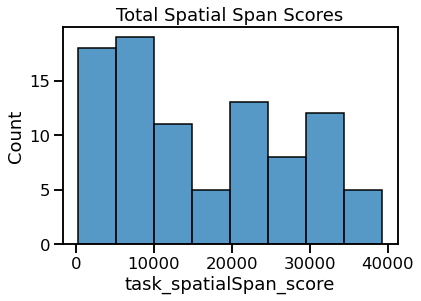

In [18]:
sns.histplot(data=perf_tasks_sum, x='task_spatialSpan_score').set(title='Total Spatial Span Scores');

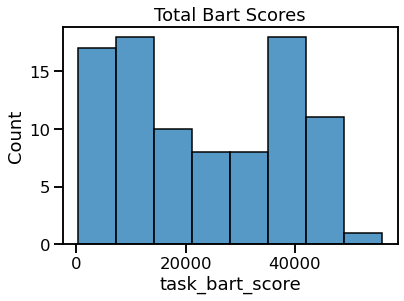

In [19]:
sns.histplot(data=perf_tasks_sum, x='task_bart_score').set(title='Total Bart Scores');

#### Averages

In [20]:
perf_tasks_summary = pd.DataFrame(perf_tasks.groupby(['ParticipantIdentifier']).agg({'task_spatialSpan_score': ['mean', 'std'], 'task_bart_score': ['mean', 'std']})).reset_index()
perf_tasks_summary.columns = ["_".join(a) for a in perf_tasks_summary.columns.to_flat_index()]
perf_tasks_summary.sample(5)

ParticipantIdentifier_  task_spatialSpan_score_mean  \
46  76acef3c-d659-4fdd-b258-3668a1597584                   407.098765   
57  a01397bb-a8a5-4cd1-af6f-6ace410f125d                   454.074074   
23  39efadc3-7957-4b75-b560-d0d6c89cfe8b                   409.722222   
32  596d1036-bafa-47c3-9886-a588a37789bb                   391.075949   
41  6c1b2b3c-3c06-4238-830d-65b76904e8b5                   436.824324   

    task_spatialSpan_score_std  task_bart_score_mean  task_bart_score_std  
46                   89.113215            570.185185            90.278889  
57                   70.267841            528.703704           123.808768  
23                   86.124179            501.862745           142.256672  
32                   79.059661            513.354430            53.088711  
41                   81.335490            560.135135            77.207127

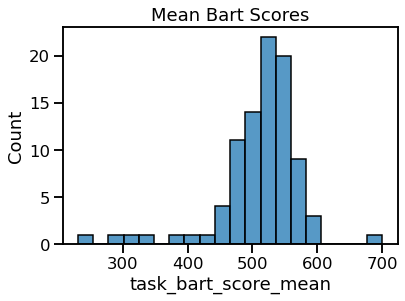

In [21]:
sns.histplot(data=perf_tasks_summary, x='task_bart_score_mean').set(title='Mean Bart Scores');

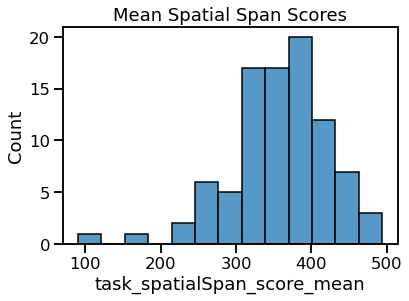

In [22]:
sns.histplot(data=perf_tasks_summary, x='task_spatialSpan_score_mean').set(title='Mean Spatial Span Scores');

#### Variance

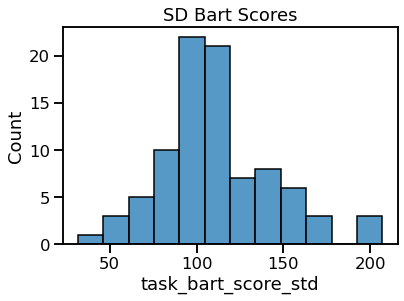

In [23]:
sns.histplot(data=perf_tasks_summary, x='task_bart_score_std').set(title='SD Bart Scores');

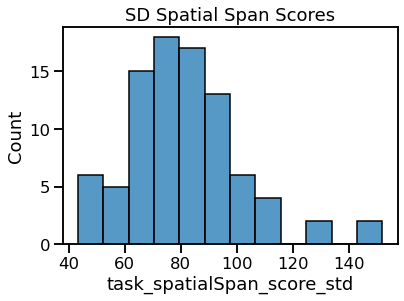

In [24]:
sns.histplot(data=perf_tasks_summary, x='task_spatialSpan_score_std').set(title='SD Spatial Span Scores');

#### Average vs. Variance

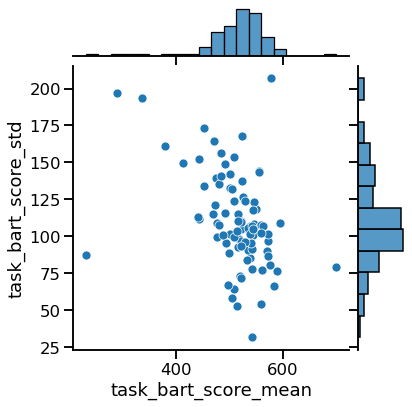

In [25]:
sns.jointplot(perf_tasks_summary, x="task_bart_score_mean", y="task_bart_score_std");

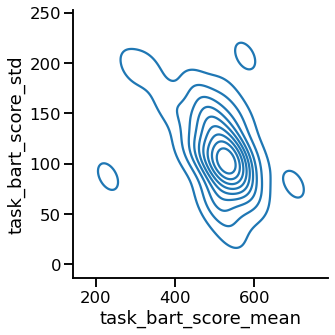

In [26]:
sns.displot(perf_tasks_summary, x="task_bart_score_mean", y="task_bart_score_std", kind='kde');

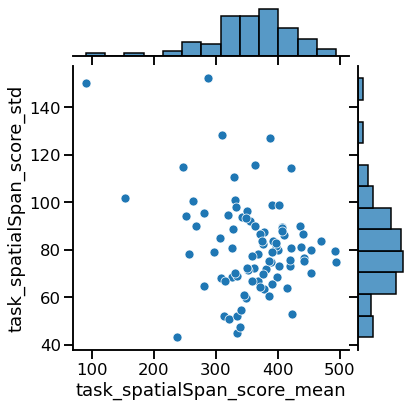

In [27]:
sns.jointplot(perf_tasks_summary, x="task_spatialSpan_score_mean", y="task_spatialSpan_score_std");

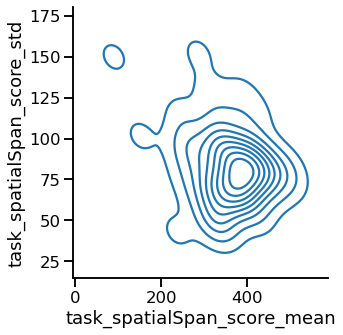

In [28]:
sns.displot(perf_tasks_summary, x="task_spatialSpan_score_mean", y="task_spatialSpan_score_std", kind='kde');

**QUESTION**

What would be the optimal strategy for BART - and what would be the variance/sd of that strategy?

### Convert to Dollars

In [29]:
perf_tasks_sum.head()

ParticipantIdentifier  task_spatialSpan_score  \
0  0501ba67-3406-4779-aff1-878a0e9f7885                 31185.0   
1  099765a5-a9c9-4fff-b297-a39eab517267                  7170.0   
2  0ca43379-41b5-47fb-90ba-0a22e6bf5586                 24835.0   
3  146e1ab8-c4ca-4a52-9261-e108b38eea53                 38045.0   
4  147400db-43d9-4155-8bf2-b85b8adf4315                 20215.0   

   task_bart_score  
0          35915.0  
1           4390.0  
2          42620.0  
3          44045.0  
4          44455.0

In [30]:
amt_per_task = 1000

perf_tasks_sum['bart_earnings'] = (perf_tasks_sum.task_bart_score / perf_tasks_sum.task_bart_score.sum()) * amt_per_task
perf_tasks_sum['spatialSpan_earnings'] = (perf_tasks_sum.task_spatialSpan_score / perf_tasks_sum.task_spatialSpan_score.sum()) * amt_per_task

In [31]:
payment = perf_tasks_sum[['ParticipantIdentifier', 'bart_earnings', 'spatialSpan_earnings']]
payment.sample(6)

ParticipantIdentifier  bart_earnings  spatialSpan_earnings
33  5bbaec14-546b-4fdb-985a-4065b4742339       2.298499              2.001922
74  d1b92e8e-c6b8-49d5-9dfd-8aacea8cd493      15.373565             13.459588
80  d99872af-3068-4840-9118-3e5724df83b8       7.561966              8.464793
83  deaf9ec8-984d-41bb-aab6-ef213452c297       6.440977              5.355141
78  d92cdaf1-cc3e-4408-bcdf-7be602cc5c3b       2.760082              2.725950
46  76acef3c-d659-4fdd-b258-3668a1597584      21.753312             22.004458

In [32]:
perf_tasks_sum.describe()

task_spatialSpan_score  task_bart_score  bart_earnings  \
count               91.000000        91.000000      91.000000   
mean             16467.692308     23331.043956      10.989011   
std              11432.588370     15305.142500       7.208781   
min                240.000000       305.000000       0.143656   
25%               6790.000000     11077.500000       5.217545   
50%              13860.000000     21195.000000       9.982926   
75%              27470.000000     39645.000000      18.672947   
max              39320.000000     56000.000000      26.376214   

       spatialSpan_earnings  
count             91.000000  
mean              10.989011  
std                7.629049  
min                0.160154  
25%                4.531016  
50%                9.248879  
75%               18.330931  
max               26.238522

## Save Data

In [39]:
# Export to processed data folder
df.to_csv('../../3_3_2_processed_data/run1_earningsSummary.csv')

In [33]:
perf_tasks_sum.to_csv('../../3_3_2_processed_data/run1_earningsTasks.csv')

### Montreal Data


In [36]:
np.arange(1998, 2023,1)

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022])

In [39]:
years = pd.Series(np.arange(1998, 2023,1), name='year')
mean_temp = pd.Series([8.8,
             8.5,
             6.7,
             8.4,
             7.8,
             6.7,
             6.6,
             7.8,
             8.4,
             7.2,
             7.3,
             6.9,
             8.6,
             8.2,
             8.8,
             7.3,
             7.0,
             7.4,
             8.3,
             7.8,
             7.6,
             6.9,
             8.5,
             8.9,
             8.0
            ], name='mean_temp')

df = pd.concat([years, mean_temp], axis = 1)

<AxesSubplot:xlabel='year', ylabel='mean_temp'>

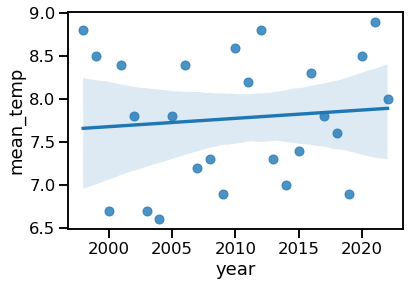

In [41]:
sns.regplot(data=df, x='year', y='mean_temp')

In [44]:
import statsmodels.api as sm

model = sm.OLS(df['mean_temp'], df['year'], missing='drop')
model_result = model.fit()
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              mean_temp   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              2772.
Date:                Tue, 10 Jan 2023   Prob (F-statistic):                    2.59e-26
Time:                        10:23:27   Log-Likelihood:                         -27.383
No. Observations:                  25   AIC:                                      56.77
Df Residuals:                      24   BIC:                                      57.99
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year           0.0039   7.35e-05     52.652      0.000       0.004       0.004
==============================================================================
Omnibus:                        7.158   Durbin-Watson:                   1.700
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                1.935
Skew:                          -0.059   Prob(JB):                        0.380
Kurtosis:                       1.642   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""